In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy.stats import zscore
import seaborn as sns

In [2]:
# reading the CSV file into pandas dataframe
Data = pd.read_csv("Nutrient.csv") 
Data.head(10)

,S.No,Protein,Fat,vitaminC,Fiber,Product
0,1,-0.749825,0.426892,0.287212,1.279936,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.230835,-0.304578,-0.881972,-0.387079,Bacon and beef sticks
2,3,-0.060478,0.451551,2.450659,1.729280,"Apples, frozen, unsweetened, unheated (Include..."
3,4,-0.330121,-0.508314,-1.008903,-0.848201,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,-1.259850,-0.560451,-1.255896,-0.548145,"Alcoholic beverage, daiquiri, canned"
5,6,0.549775,-1.049436,-0.566616,-0.820785,"Alcoholic beverage, liqueur, coffee, 63 proof"
6,7,-0.910622,-0.351360,-0.559536,0.322276,"Alcoholic beverage, pina colada, canned"
7,8,-0.458005,0.509999,-0.913407,-0.359618,"Alcoholic beverage, tequila sunrise, canned"
8,9,-0.629847,0.551613,0.557541,-0.017446,"Apples, raw, without skin"
9,10,-0.516439,-1.311063,0.838666,-0.896243,"Alcoholic beverage, whiskey sour, canned"


In [4]:
NutrientAttr = Data.iloc[:,1:5]
NutrientAttr.head()

,Protein,Fat,vitaminC,Fiber
0,-0.749825,0.426892,0.287212,1.279936
1,2.230835,-0.304578,-0.881972,-0.387079
2,-0.060478,0.451551,2.450659,1.729280
3,-0.330121,-0.508314,-1.008903,-0.848201
4,-1.259850,-0.560451,-1.255896,-0.548145


In [5]:
NutrientDataScaled=NutrientAttr.apply(zscore)
NutrientDataScaled.head(10)

,Protein,Fat,vitaminC,Fiber
0,-0.749825,0.426892,0.287212,1.279936
1,2.230835,-0.304578,-0.881972,-0.387079
2,-0.060478,0.451551,2.450659,1.729280
3,-0.330121,-0.508314,-1.008903,-0.848201
4,-1.259850,-0.560451,-1.255896,-0.548145
5,0.549775,-1.049436,-0.566616,-0.820785
6,-0.910622,-0.351360,-0.559536,0.322276
7,-0.458005,0.509999,-0.913407,-0.359618
8,-0.629847,0.551613,0.557541,-0.017446
9,-0.516439,-1.311063,0.838666,-0.896243


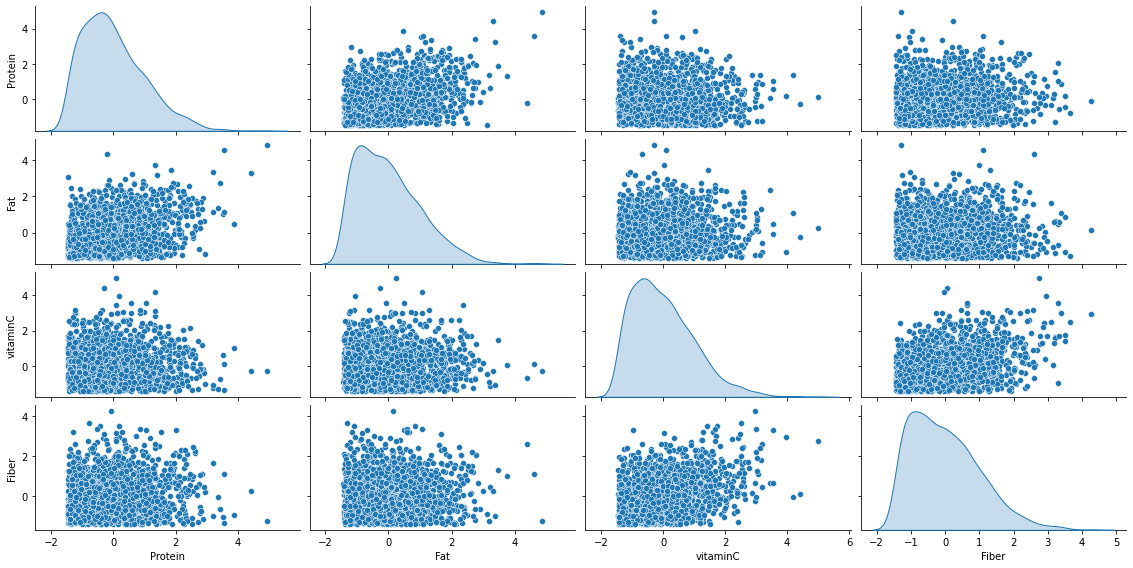

In [6]:
#importing seaborn for statistical plots
sns.pairplot(NutrientDataScaled, height=2,aspect=2 , diag_kind='kde')

In [7]:
from sklearn.cluster import AgglomerativeClustering 

In [8]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [9]:
model.fit(NutrientDataScaled)

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)

In [14]:
NutrientAttr['labels'] = model.labels_
NutrientAttr.head()

#custDataAttr.groupby(["labels"]).count()

,Protein,Fat,vitaminC,Fiber,labels
0,-0.749825,0.426892,0.287212,1.279936,0
1,2.230835,-0.304578,-0.881972,-0.387079,0
2,-0.060478,0.451551,2.450659,1.729280,0
3,-0.330121,-0.508314,-1.008903,-0.848201,0
4,-1.259850,-0.560451,-1.255896,-0.548145,0


In [20]:
NutrientDataClust = NutrientAttr.groupby(['labels'])

In [21]:
NutrientDataClust.mean()

,Protein,Fat,vitaminC,Fiber
labels,,,,
0,-0.011124,-0.013341,0.001714,-0.000563
1,3.910180,3.766992,-0.462339,-0.322971
2,-0.194791,4.377637,-0.671407,2.595249


In [22]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [23]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [24]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(NutrientDataScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(NutrientDataScaled))

c

0.6521952320774799

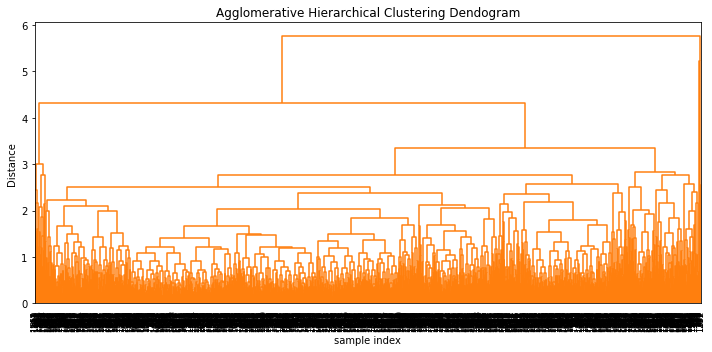

In [25]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [26]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(NutrientDataScaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(NutrientDataScaled))

c

0.48695720692975825

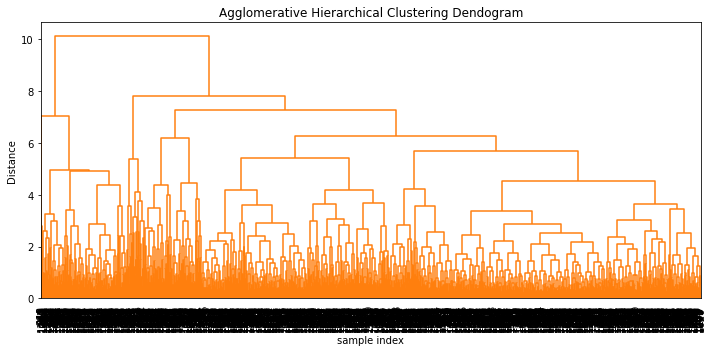

In [27]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [29]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(NutrientDataScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(NutrientDataScaled))

c

0.45786619671650625

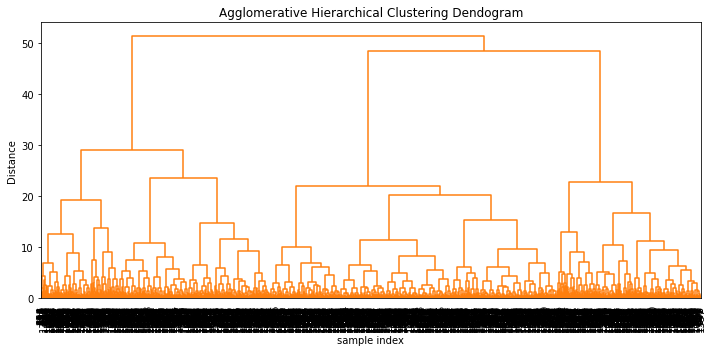

In [30]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()